sigma2 = 4.672766595447597e-08
As = 14389762.173336025
sigma_cdm_test = 0.8200329811865678


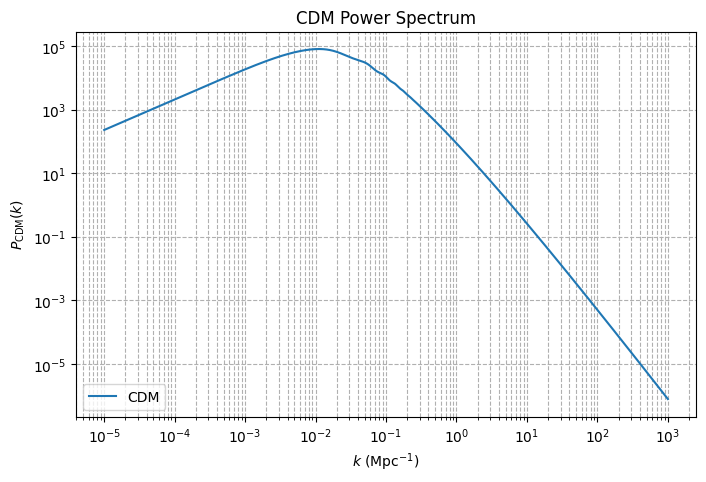

In [209]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import quad

h = 0.6774
ns = 0.96
r = 8/h

data = np.loadtxt('transfer-function.txt')
k = data[:,0]
T = data[:,1]

lgTk = interp1d(np.log10(k),np.log10(T),kind = 'cubic')

def Tk(k):
    return 10 ** lgTk(np.log10(k))[()]

def w(k):
    return 3 * (np.sin(k * r) - (k * r) * np.cos(k * r)) / (k*r)**3

def I(t):
    k = np.exp(t)
    B = (4 * np.pi * (k**2)) / ((2 * np.pi)**3)
    C = (k**ns) * (Tk(k)**2)
    D = w(k)**2
    return B * C * D * k

sigma2,err = quad(I,np.log(np.min(k)),np.log(np.max(k)),epsrel=1e-5)
As = (0.82**2) / sigma2
print('sigma2 =',sigma2)
print('As =',As)

def P(k):
    return (k**ns) * (Tk(k)**2)

k_values = np.logspace(-5, 3, 1000)
Pcdm_values = As * P(k_values)
Dcdm_values = (4 * np.pi) * ((k_values / (2 * np.pi))**3) * Pcdm_values

plt.figure(figsize=(8, 5))
plt.loglog(k_values, Pcdm_values, label='CDM')
plt.xlabel(r'$k$ (Mpc$^{-1}$)')
plt.ylabel(r'$P_{\mathrm{CDM}}(k)$')
plt.legend(loc='lower left')
plt.grid(True, which="both", linestyle="--", alpha=1)
#plt.xlim(0.01,1000)
#plt.ylim(0.01,100)
plt.title("CDM Power Spectrum")

def I_cdm_test(t):
    return As * I(t)
sigma2_cdm_test,err = quad(I_cdm_test,np.log(np.min(k)),np.log(np.max(k)),epsrel=1e-5)
print('sigma_cdm_test =',np.sqrt(sigma2_cdm_test))

sigma2(m=10) = 4.6727604910623495e-08
As(m=10) = 14389780.971785484
sigma_wdm_test(m=10) = 0.8200329763158548
sigma2(m=1) = 4.6709164094781284e-08
As(m=1) = 14395462.068976006
sigma_wdm_test(m=1) = 0.8200316648251855
sigma2(m=0.1) = 4.237277985051011e-08
As(m=0.1) = 15868678.01386189
sigma_wdm_test(m=0.1) = 0.8199955694163329


Text(0.5, 1.0, 'WDM Power Spectrum')

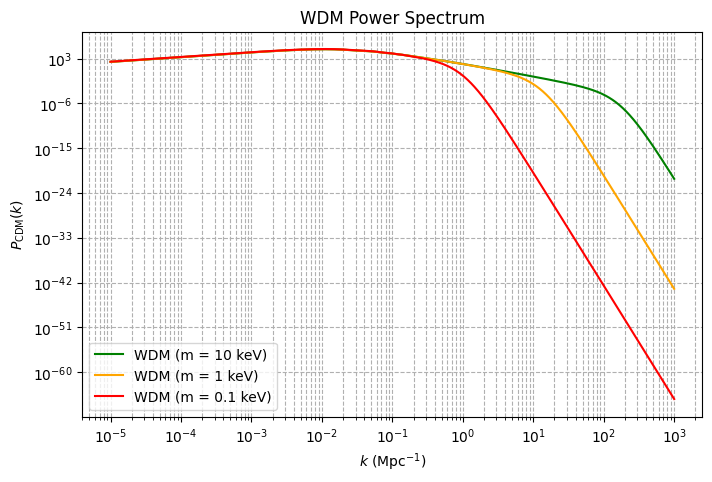

In [201]:
u = 1.12
omega_wdm = 0.32
m = [10, 1, 0.1]
As_wdm_list = []

def a(m):
    return 0.049 * (m ** -1.11) * ((omega_wdm / 0.25)**0.15) * ((h/0.7)**1.22) / h

def T(k,m):
    return (1+(a(m) * k)**(2*u))**(-5/u)

k_values = np.logspace(-5, 3, 1000)
plt.figure(figsize=(8, 5))
colors = ['green', 'orange', 'red']

for m_i, colors_i in zip(m, colors):

    def I_WDM(t):
        return I(t) * (T(np.exp(t),m_i)) ** 2
    
    sigma2_wdm,err = quad(I_WDM,np.log(np.min(k)),np.log(np.max(k)),epsrel=1e-5)
    As_wdm = (0.82**2) / sigma2_wdm
    As_wdm_list.append(As_wdm)
    print(f'sigma2(m={m_i}) = {sigma2_wdm}')
    print(f'As(m={m_i}) = {As_wdm}')

    def I_wdm_test(t):
        return As_wdm * I(t) * (T(np.exp(t),m_i)) ** 2
    sigma2_wdm_test,err = quad(I_wdm_test,np.log(np.min(k)),np.log(np.max(k)),epsrel=1e-5)
    print(f'sigma_wdm_test(m={m_i}) =',np.sqrt(sigma2_wdm_test))
    
    Pwdm_values = As_wdm * P(k_values) * ((T(k_values, m_i))**2)
    Dwdm_values = As_wdm * (4 * np.pi) * ((k_values / (2 * np.pi))**3) * Pwdm_values
    plt.loglog(k_values, Pwdm_values, label=f'WDM (m = {m_i} keV)', color=colors_i)

plt.xlabel(r'$k$ (Mpc$^{-1}$)')
plt.ylabel(r'$P_{\mathrm{CDM}}(k)$')
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=1)
#plt.xlim(0.01,1000)
#plt.ylim(0.01,100)
plt.title("WDM Power Spectrum")

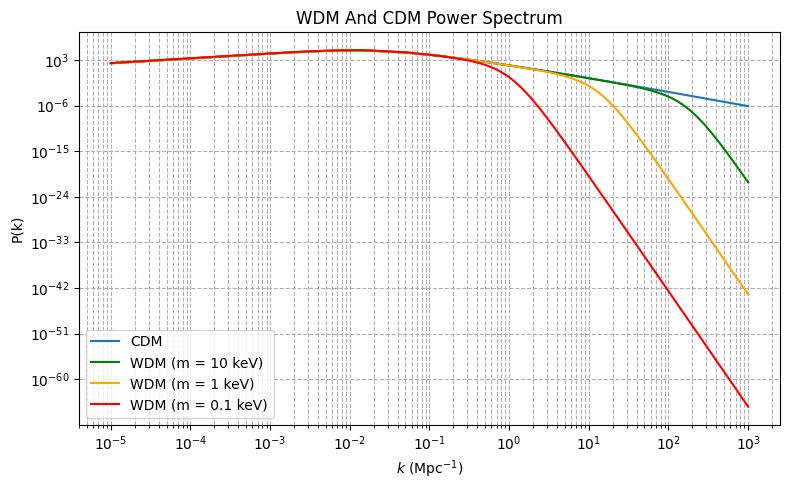

In [191]:
k_values = np.logspace(-5, 3, 1000)
plt.figure(figsize=(8, 5))

plt.loglog(k_values, Pcdm_values, label='CDM')

colors = ['green', 'orange', 'red']
for m_i, colors_i, As_i in zip(m, colors, As_wdm_list):
    T_wdm = T(k_values, m_i)
    Pwdm_values = As_i * P(k_values) * (T_wdm**2)
    plt.loglog(k_values, Pwdm_values, label=f'WDM (m = {m_i} keV)', color = colors_i)

plt.xlabel(r'$k$ (Mpc$^{-1}$)')
plt.ylabel('P(k)')
plt.title('WDM And CDM Power Spectrum')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=1)
plt.tight_layout()